In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
vel = pd.read_csv('VDSvel240701.csv', encoding='cp949')
vel.head()

,집계일자,집계시분,VDS_ID,지점이정,차로유형구분코드,평균속도,Unnamed: 6
0,2024-07-01,00:00,0010VDE00100,1.4,1,80.79,NaN
1,2024-07-01,00:00,0010VDE00200,2.4,1,91.18,NaN
2,2024-07-01,00:00,0010VDE00300,3.3,1,83.18,NaN
3,2024-07-01,00:00,0010VDE00400,4.5,1,-1.00,NaN
4,2024-07-01,00:00,0010VDE00500,5.1,1,-1.00,NaN


In [4]:
traf = pd.read_csv('VDStraffic240701.csv', encoding='cp949')
traf.head()

,집계일자,집계시분,VDS_ID,지점이정,콘존ID,차로유형구분코드,교통량,Unnamed: 7
0,2024-07-01,00:00,0010VDE00100,1.4,0010CZE010,1,28,NaN
1,2024-07-01,00:00,0010VDE00200,2.4,0010CZE011,1,20,NaN
2,2024-07-01,00:00,0010VDE00300,3.3,0010CZE011,1,19,NaN
3,2024-07-01,00:00,0010VDE00400,4.5,0010CZE020,1,-1,NaN
4,2024-07-01,00:00,0010VDE00500,5.1,0010CZE030,1,-1,NaN


In [5]:
# drop missing values & concern type 1 load only
dropIdx = vel[(vel['차로유형구분코드']==2)|(vel['평균속도']==-1.0)].index
vel = vel.drop(dropIdx)
# add a new column 'hour'
vel['hour'] = vel['집계시분'].apply(lambda x: int(x.split(':')[0])+int(x.split(':')[1])/60)
# single out necessary columns
vel = vel.iloc[:,[7,2,5]]
vel.head()

,hour,VDS_ID,평균속도
0,0.0,0010VDE00100,80.79
1,0.0,0010VDE00200,91.18
2,0.0,0010VDE00300,83.18
11,0.0,0010VDE01200,91.94
12,0.0,0010VDE01300,88.09


In [6]:
# do the same for traffic data
dropIdx = traf[(traf['차로유형구분코드']==2)|(traf['교통량']==-1.0)].index
traf = traf.drop(dropIdx)
# add a new column 'hour'
traf['hour'] = traf['집계시분'].apply(lambda x: int(x.split(':')[0])+int(x.split(':')[1])/60)
# single out necessary columns
traf = traf.iloc[:,[8,2,6]]
traf.head()

,hour,VDS_ID,교통량
0,0.0,0010VDE00100,28
1,0.0,0010VDE00200,20
2,0.0,0010VDE00300,19
11,0.0,0010VDE01200,10
12,0.0,0010VDE01300,14


In [7]:
# merge the two dfs
mdf = pd.merge(vel, traf, how='outer')
mdf.head()

,hour,VDS_ID,평균속도,교통량
0,0.0,0010VDE00100,80.79,28
1,0.0,0010VDE00200,91.18,20
2,0.0,0010VDE00300,83.18,19
3,0.0,0010VDE01200,91.94,10
4,0.0,0010VDE01300,88.09,14


In [8]:
# create a list of VDS_IDs
ids = mdf['VDS_ID'].unique()
len(ids)

6333

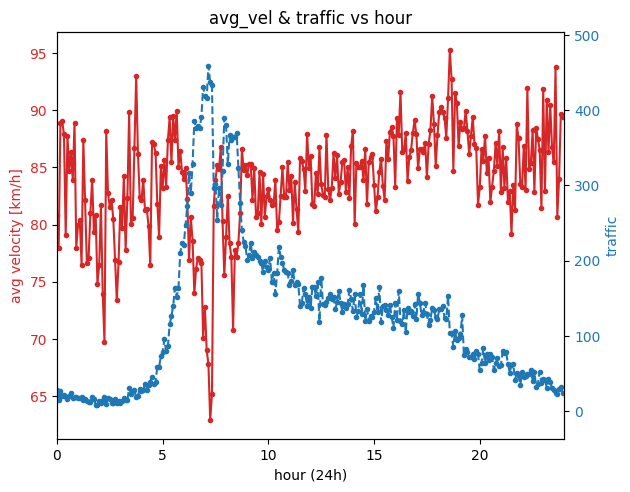

In [40]:
# sample plot where vel and traf are plotted together
test = mdf[mdf['VDS_ID']==ids[0]]

fig, ax1 = plt.subplots() #vel

color = 'tab:red'
ax1.set_xlabel('hour (24h)')
ax1.set_xlim([0,24])
ax1.set_ylabel('avg velocity [km/h]', color=color)
ax1.plot(test['hour'],test['평균속도'],'.-',color=color,zorder=1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # traf

color = 'tab:blue'
ax2.set_ylabel('traffic', color=color)  # we already handled the x-label with ax1
ax2.plot(test['hour'],test['교통량'],'.--',color=color,zorder=0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('avg_vel & traffic vs hour')
plt.show()

In [49]:
mdf['평균속도'].corr(mdf['교통량'])

0.06760237945007587

In [42]:
fig.savefig('velTraffSample.png',bbox_inches='tight')

In [47]:
nrows = 100
ncols = 3
idx = 0
figNumMax = len(ids)//(nrows*ncols)

In [ ]:
for n in range(figNumMax):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True,figsize=(6,2))
    fig.set_size_inches(14, nrows*2)
    plt.setp(axs, xlim=(0,24))
    plt.tight_layout()
    for i in range(nrows):
        for j in range(ncols):
            dfTemp = df[df['VDS_ID']==ids[idx]]

            subFig, ax1 = plt.subplots() #vel

            color = 'tab:red'
            ax1.set_xlabel('hour (24h)')
            ax1.set_xlim([0,24])
            ax1.set_ylabel('avg velocity [km/h]', color=color)
            ax1.plot(test['hour'],test['평균속도'],'.-',color=color,zorder=1)
            ax1.tick_params(axis='y', labelcolor=color)
            
            ax2 = ax1.twinx()  # traf
            
            color = 'tab:blue'
            ax2.set_ylabel('traffic', color=color)  # we already handled the x-label with ax1
            ax2.plot(test['hour'],test['교통량'],'.--',color=color,zorder=0)
            ax2.tick_params(axis='y', labelcolor=color)

            axs[i][j].plot(dfTemp['hour'],dfTemp['평균속도'],'.-')
            axs[i][j].set_title(idx)
            axs[i][j].set_ylim(dfTemp['평균속도'].values.min(), dfTemp['평균속도'].values.max())
            idx += 1
    plt.show()
    fig.savefig('velPattern0701_{n}.png'.format(n=n))